# Naive Bayes Classifier

## My Implementation - With Class

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

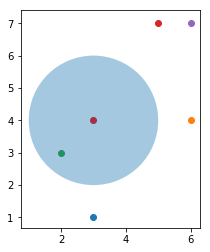

1.4142135623730951


In [57]:

#This part is just for intuition, how does it work in the background
X = np.array([[1, 3],[4, 6],[3, 2],[7, 5],[7, 6]])
for i in range(len(X)):
    plt.scatter(X[i][1], X[i][0])

plt.scatter(3, 4, color='red')
circle = plt.Circle((3, 4), radius=2, alpha=0.4)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.show()

euclidianDis = np.sqrt((3-2)**2 + (4-3)**2)
print(euclidianDis)

In [58]:
class NaiveBayesClassifier(object):
    
    def __init__(self):
        pass
    
    #Input: X - features of a trainset
    #       y - labels of a trainset
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        self.no_of_classes = np.max(self.y_train) + 1
     
        
    #This is our function to calculate all nodes/samples in our radius    
    def euclidianDistance(self, Xtest, Xtrain):
        return np.sqrt(np.sum(np.power((Xtest - Xtrain), 2)))
    
       
    #our main function is predict
    #All calculation is done by using our test or new samples
    #There are 4 steps to be performed:
    # 1. calculate Prior probability. Ex. P(A) = No_of_elements_of_one_class / total_no_of_samples
    # 2. calculate Margin probability P(X) = No_of_elements_in_radius / total_no_of_samples
    # 3. calculate Likeliyhood (P(X|A) = No_of_elements_of_current_class / total_no_of_samples
    # 4. calculate Posterior probability: P(A|X) = (P(X|A) * P(A)) / P(X)
    # NOTE: Do these steps for all clases in dataset!
    #
    #Inputs: X - test dataset
    #       radius - this parameter is how big circle is going to be around our new datapoint, default = 2
    def predict(self, X, radius=0.4):   
        pred = []
        
        #Creating list of numbers of elements for each class in trainset
        members_of_class = []
        for i in range(self.no_of_classes):
            counter = 0
            for j in range(len(self.y_train)):
                if self.y_train[j] == i:
                    counter += 1
            members_of_class.append(counter)
        
        #Entering the process of prediction
        for t in range(len(X)):
            #Creating empty list for every class probability
            prob_of_classes = []
            #looping through each class in dataset
            for i in range(self.no_of_classes):
                
                #1. step > Prior probability P(class) = no_of_elements_of_that_class/total_no_of_elements
                prior_prob = members_of_class[i]/len(self.y_train)

                #2. step > Margin probability P(X) = no_of_elements_in_radius/total_no_of_elements
                #NOTE: In the same loop collecting infromation for 3. step as well
                
                inRadius_no = 0
                #counter for how many points are from the current class in circle
                inRadius_no_current_class = 0
                
                for j in range(len(self.X_train)):
                    if self.euclidianDistance(X[t], self.X_train[j]) < radius:
                        inRadius_no += 1
                        if self.y_train[j] == i:
                            inRadius_no_current_class += 1
                
                #Computing, margin probability
                margin_prob = inRadius_no/len(self.X_train)
                
                #3. step > Likelihood P(X|current_class) = no_of_elements_in_circle_of_current_class/total_no_of_elements
                likelihood = inRadius_no_current_class/len(self.X_train)
                
                #4. step > Posterial Probability > formula from Bayes theorem: P(current_class | X) = (likelihood*prior_prob)/margin_prob
                post_prob = (likelihood * prior_prob)/margin_prob
                prob_of_classes.append(post_prob)
            
            #Getting index of the biggest element (class with the biggest probability)
            pred.append(np.argmax(prob_of_classes))
                
        return pred

In [59]:
def accuracy(y_tes, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_tes[i] == y_pred[i]):
            correct += 1
    return (correct/len(y_tes))*100

In [62]:
#Testing Breast Cancer dataset
def breastCancerTest():
    # Importing the dataset
    dataset = pd.read_csv('breastCancer.csv')
    dataset.replace('?', 0, inplace=True)
    dataset = dataset.applymap(np.int64)
    X = dataset.iloc[:, 1:-1].values    
    y = dataset.iloc[:, -1].values
    #This part is necessery beacuse of NUMBER of features part of algo
    #and in this dataset classes are marked with 2 and 4
    y_new = []
    for i in range(len(y)):
        if y[i] == 2:
            y_new.append(0)
        else:
            y_new.append(1)
    y_new = np.array(y_new)


    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

    
    #Testing my Naive Bayes Classifier
    NB = NaiveBayesClassifier()
    NB.fit(X_train, y_train)
    
    y_pred = NB.predict(X_test, radius=8)
    
    #sklearn
    from sklearn.naive_bayes import GaussianNB
    NB_sk = GaussianNB()
    NB_sk.fit(X_train, y_train)
    
    sk_pred = NB_sk.predict(X_test)
     
    
    print("Accuracy for my Naive Bayes Classifier: ", accuracy(y_test, y_pred), "%")
    print("Accuracy for sklearn Naive Bayes Classifier: ",accuracy(y_test, sk_pred), "%")

In [63]:
breastCancerTest()

Accuracy for my Naive Bayes Classifier:  96.57142857142857 %
Accuracy for sklearn Naive Bayes Classifier:  95.42857142857143 %


## My Implementation - Without Class

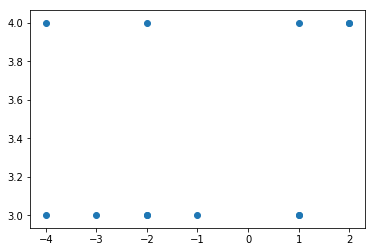

In [76]:
# Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

#assigning predictor and target variables
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
x_new=x[:,0].reshape(len(x),1)
Y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])
Y_new=Y.reshape(len(Y),1)
plt.scatter(x_new,Y)
plt.show()
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(x, Y)


#Predict Output 
predicted= model.predict([[990,90]])

In [77]:
predicted

array([4])

In [78]:
import math
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [79]:
def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated

In [80]:
def mean(numbers):
	return sum(numbers)/float(len(numbers))

def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)

def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]
	return summaries
def summarizeByClass(dataset):
	separated = separateByClass(dataset)
	summaries = {}
	for classValue, instances in separated.items():
		summaries[classValue] = summarize(instances)
	return summaries

In [81]:
def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
            
			mean, stdev = classSummaries[i]
			print(mean,stdev)
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
	print(probabilities)            
	return probabilities
			
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel

In [82]:
model.get_params([1])

{'priors': None, 'var_smoothing': 1e-09}

In [83]:
x[:,0].mean(),x[:,0].std(),x[:,1].mean(),x[:,1].std()

(-0.9166666666666666, 2.1392496088322392, 3.0, 2.6457513110645907)

In [84]:
calculateProbability(0.0000009,-0.91666,2.1392)

0.17013222845739023

In [85]:
a=[[1,2],[3,4]]

a=np.array(a)

In [86]:
b=a

In [87]:
a=a.reshape(2,2)


In [88]:
a.shape

(2, 2)

In [89]:
np.hstack((a,b))

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [90]:
y=Y.reshape(12,1)

In [91]:
dataset=np.hstack((x,y))


In [92]:
dictt=separateByClass(dataset)


In [93]:
dictt[3]


[array([-3,  7,  3]),
 array([1, 5, 3]),
 array([1, 2, 3]),
 array([-2,  0,  3]),
 array([-4,  0,  3]),
 array([-1,  1,  3]),
 array([-2,  2,  3])]

In [94]:
calculateClassProbabilities(summarizeByClass(dataset), [1,2])


-1.4285714285714286 1.902379462422684
2.4285714285714284 2.63673679998231
-0.2 2.6832815729997477
3.8 3.03315017762062
{3: 0.01386228234958858, 4: 0.014837370040045645}


{3: 0.01386228234958858, 4: 0.014837370040045645}

In [95]:
predict(summarizeByClass(dataset),[1,2])


-1.4285714285714286 1.902379462422684
2.4285714285714284 2.63673679998231
-0.2 2.6832815729997477
3.8 3.03315017762062
{3: 0.01386228234958858, 4: 0.014837370040045645}


4

In [1]:
import csv
import random
import math

def load_csv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in  dataset[i]]
    return dataset

def split_dataset(data_set, splitRatio):
    trainSize = int(len(data_set)*splitRatio)
    trainSet = []
    copy = list(data_set)
    while len(trainSet) < trainSize:
        # generate a random number in range length of dataset
        index = random.randrange(len(copy))
        # pop that index to the trainset
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

def separate_by_class(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
#         if len(vector) != 0:
        if vector[-1] not in separated:
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers))
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = {}
    for class_name, data_items in separated.items():
        summaries[class_name] = summarize(data_items)
    return summaries


def calculate_probability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculate_class_probabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
#             import pdb
#             pdb.set_trace()
            x = inputVector[i]
            probabilities[classValue] *= calculate_probability(x, mean, stdev)
    return probabilities

def predict(summaries, inputVector):
    probabilites = calculate_class_probabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilites.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def get_predictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def get_accuracy(testSet, predictions):
    correct = 0
    if len(testSet) == 0:
        return -1
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


def main():
    filename = 'pima-indians-diabetes.data.csv'
    splitRatio = 0.67
    dataset = load_csv(filename)
#     print(dataset)
    trainingSet, testSet = split_dataset(dataset, splitRatio)
#     print(trainingSet)
    summaries = summarize_by_class(trainingSet)
    predictions = get_predictions(summaries, testSet)
    accuracy = get_accuracy(testSet, predictions)
    print('Accuracy: {0}%'.format(accuracy))

if __name__ == "__main__":
    main()

Accuracy: 76.77165354330708%
